In [17]:
%matplotlib inline

In [18]:
import datetime # Tipo de dato para fechas y horas
import pandas as pd # Manejo de datos tabulados
import numpy as np # Algebra Lineal y operaciones matematicas
import matplotlib.pyplot as plt # Graficos de datos
import seaborn as sns # Graficos estadisticos
import pandas_profiling as ppr # ?????????
import geopandas as gpd # Pandas para datos geograficos (Mapas!!)
from fitter import Fitter # Ajuste de distribuciones de probs

In [29]:
# Leemos los datos seleccionados
df_main = pd.read_csv('../data/economy-and-growth_per.csv')
df_external = pd.read_csv('../data/external-debt_per.csv')
df_financial = pd.read_csv('../data/financial-sector_per.csv')
df_indicadores = pd.read_csv('../data/indicators_per.csv')
df_health = pd.read_csv('../data/health_per.csv')
df_infrastructure = pd.read_csv('../data/infrastructure_per.csv')
df_energy = pd.read_csv('../data/energy-and-mining_per.csv')





In [6]:
df_main.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Peru,PER,2014,Annualized Mean Income Growth (2004-2014),5.0.AMeanIncGr.All,4.07865692
2,Peru,PER,2014,Annualized Mean Income Growth Bottom 40 Percen...,5.0.AMeanIncGr.B40,6.48736384
3,Peru,PER,2009,Annualized Mean Income Growth (2004-2009),5.1.AMeanIncGr.All,5.05714401
4,Peru,PER,2009,Annualized Mean Income Growth Bottom 40 Percen...,5.1.AMeanIncGr.B40,7.20753731


In [ ]:
df_external.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Peru,PER,2020,"Imports of goods, services and primary income ...",BM.GSR.TOTL.CD,50176078373.8539
2,Peru,PER,2019,"Imports of goods, services and primary income ...",BM.GSR.TOTL.CD,63352690362.2345
3,Peru,PER,2018,"Imports of goods, services and primary income ...",BM.GSR.TOTL.CD,64891853578.1998
4,Peru,PER,2017,"Imports of goods, services and primary income ...",BM.GSR.TOTL.CD,60304621972.2648


In [ ]:
df_indicadores.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Peru,PER,1995,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,13191
2,Peru,PER,1994,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,13000
3,Peru,PER,1993,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,13000
4,Peru,PER,1992,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,12800


In [8]:
df_health.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Peru,PER,2016,Proportion of women subjected to physical and/...,SG.VAW.1549.ZS,10.8
2,Peru,PER,2012,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,0.8
3,Peru,PER,2011,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,0.6
4,Peru,PER,2010,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,1


In [9]:
df_infrastructure.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Peru,PER,2020,"ICT service exports (BoP, current US$)",BX.GSR.CCIS.CD,105292041.06448
2,Peru,PER,2019,"ICT service exports (BoP, current US$)",BX.GSR.CCIS.CD,112561099.593895
3,Peru,PER,2018,"ICT service exports (BoP, current US$)",BX.GSR.CCIS.CD,108513658.206156
4,Peru,PER,2017,"ICT service exports (BoP, current US$)",BX.GSR.CCIS.CD,147909108.62506


In [10]:
df_energy.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Peru,PER,2015,Energy intensity level of primary energy (MJ/$...,EG.EGY.PRIM.PP.KD,2.79098842070488
2,Peru,PER,2014,Energy intensity level of primary energy (MJ/$...,EG.EGY.PRIM.PP.KD,2.78241677083545
3,Peru,PER,2013,Energy intensity level of primary energy (MJ/$...,EG.EGY.PRIM.PP.KD,2.46188419857603
4,Peru,PER,2012,Energy intensity level of primary energy (MJ/$...,EG.EGY.PRIM.PP.KD,2.61583612032158


#Tiene 12387 observaciones, 0 a 12386

In [ ]:
df_indicadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96248 entries, 0 to 96247
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    96248 non-null  object
 1   Country ISO3    96248 non-null  object
 2   Year            96248 non-null  object
 3   Indicator Name  96248 non-null  object
 4   Indicator Code  96248 non-null  object
 5   Value           96248 non-null  object
dtypes: object(6)
memory usage: 4.4+ MB


In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12387 entries, 0 to 12386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    12387 non-null  object
 1   Country ISO3    12387 non-null  object
 2   Year            12387 non-null  object
 3   Indicator Name  12387 non-null  object
 4   Indicator Code  12387 non-null  object
 5   Value           12387 non-null  object
dtypes: object(6)
memory usage: 580.8+ KB


In [6]:
df_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    2709 non-null   object
 1   Country ISO3    2709 non-null   object
 2   Year            2709 non-null   object
 3   Indicator Name  2709 non-null   object
 4   Indicator Code  2709 non-null   object
 5   Value           2709 non-null   object
dtypes: object(6)
memory usage: 127.1+ KB


In [7]:
df_financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4301 entries, 0 to 4300
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    4301 non-null   object
 1   Country ISO3    4301 non-null   object
 2   Year            4301 non-null   object
 3   Indicator Name  4301 non-null   object
 4   Indicator Code  4301 non-null   object
 5   Value           4301 non-null   object
dtypes: object(6)
memory usage: 201.7+ KB


In [9]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10711 entries, 0 to 10710
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    10711 non-null  object
 1   Country ISO3    10711 non-null  object
 2   Year            10711 non-null  object
 3   Indicator Name  10711 non-null  object
 4   Indicator Code  10711 non-null  object
 5   Value           10711 non-null  object
dtypes: object(6)
memory usage: 502.2+ KB


In [10]:
df_infrastructure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    858 non-null    object
 1   Country ISO3    858 non-null    object
 2   Year            858 non-null    object
 3   Indicator Name  858 non-null    object
 4   Indicator Code  858 non-null    object
 5   Value           858 non-null    object
dtypes: object(6)
memory usage: 40.3+ KB


In [11]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    1169 non-null   object
 1   Country ISO3    1169 non-null   object
 2   Year            1169 non-null   object
 3   Indicator Name  1169 non-null   object
 4   Indicator Code  1169 non-null   object
 5   Value           1169 non-null   object
dtypes: object(6)
memory usage: 54.9+ KB


In [12]:
# Validar integridad del identificador "único"
len(df_main['Indicator Code'].unique()), df_main.shape[0]

(269, 12387)

In [14]:
# Validar integridad del identificador "único"
len(df_external['Indicator Code'].unique()), df_external.shape[0]

(59, 2709)

In [15]:
len(df_financial['Indicator Code'].unique()), df_financial.shape[0]

(176, 4301)

In [16]:
len(df_indicadores['Indicator Code'].unique()), df_indicadores.shape[0]

(3981, 96248)

In [18]:
len(df_health['Indicator Code'].unique()), df_health.shape[0]

(576, 10711)

In [19]:
len(df_infrastructure['Indicator Code'].unique()), df_infrastructure.shape[0]

(42, 858)

In [20]:
len(df_energy['Indicator Code'].unique()), df_energy.shape[0]

(32, 1169)

In [13]:
filtro_duplicados = df_main['Indicator Code'].duplicated(keep=False)
df_main[filtro_duplicados]['Indicator Code'].value_counts().head()

NE.EXP.GNFS.KN    61
NE.DAB.TOTL.KD    61
NE.DAB.TOTL.ZS    61
NE.EXP.GNFS.CD    61
NE.EXP.GNFS.CN    61
Name: Indicator Code, dtype: int64

In [24]:
filtro_duplicados = df_external['Indicator Code'].duplicated(keep=False)
df_external[filtro_duplicados]['Indicator Code'].value_counts().head()

NY.GNP.MKTP.CD       61
FI.RES.TOTL.CD       61
DT.ODA.ODAT.GN.ZS    60
BX.GRT.EXTA.CD.WD    60
BX.GRT.TECH.CD.WD    60
Name: Indicator Code, dtype: int64

In [ ]:
# Numero de valores perdidos / missings
value_na_count = df_main['Value'].isna().sum()
print(value_na_count)
print(round(value_na_count/ df_main.shape[0] * 100, 2), '%')


0
0.0 %


In [25]:
value_na_count = df_external['Value'].isna().sum()
print(value_na_count)
print(round(value_na_count/ df_external.shape[0] * 100, 2), '%')

0
0.0 %


In [26]:
value_na_count = df_financial['Value'].isna().sum()
print(value_na_count)
print(round(value_na_count/ df_financial.shape[0] * 100, 2), '%')

0
0.0 %


In [27]:
value_na_count = df_indicadores['Value'].isna().sum()
print(value_na_count)
print(round(value_na_count/ df_indicadores.shape[0] * 100, 2), '%')

0
0.0 %


In [30]:
value_na_count = df_health['Value'].isna().sum()
print(value_na_count)
print(round(value_na_count/ df_health.shape[0] * 100, 2), '%')

0
0.0 %


In [31]:
value_na_count = df_infrastructure['Value'].isna().sum()
print(value_na_count)
print(round(value_na_count/ df_infrastructure.shape[0] * 100, 2), '%')

0
0.0 %


In [32]:
value_na_count = df_energy['Value'].isna().sum()
print(value_na_count)
print(round(value_na_count/ df_energy.shape[0] * 100, 2), '%')

0
0.0 %


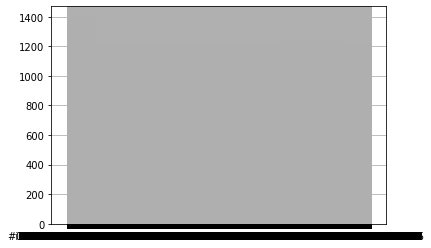

In [9]:
df_main['Value'].hist()
plt.show()

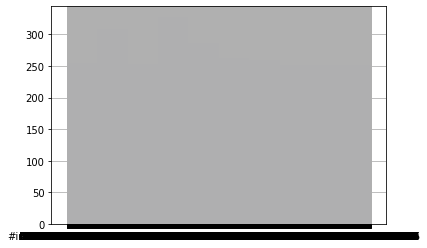

In [35]:
df_external['Value'].hist()
plt.show()

In [21]:
pd.concat([df_main,df_external,df_financial,df_indicadores,df_health,df_infrastructure,df_energy])

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Peru,PER,2014,Annualized Mean Income Growth (2004-2014),5.0.AMeanIncGr.All,4.07865692
2,Peru,PER,2014,Annualized Mean Income Growth Bottom 40 Percen...,5.0.AMeanIncGr.B40,6.48736384
3,Peru,PER,2009,Annualized Mean Income Growth (2004-2009),5.1.AMeanIncGr.All,5.05714401
4,Peru,PER,2009,Annualized Mean Income Growth Bottom 40 Percen...,5.1.AMeanIncGr.B40,7.20753731
...,...,...,...,...,...,...
1164,Peru,PER,1966,Ores and metals exports (% of merchandise expo...,TX.VAL.MMTL.ZS.UN,47.8873300852671
1165,Peru,PER,1965,Ores and metals exports (% of merchandise expo...,TX.VAL.MMTL.ZS.UN,43.9488646543684
1166,Peru,PER,1964,Ores and metals exports (% of merchandise expo...,TX.VAL.MMTL.ZS.UN,40.5548620661115
1167,Peru,PER,1963,Ores and metals exports (% of merchandise expo...,TX.VAL.MMTL.ZS.UN,36.9264247824653


In [22]:
pd.concat([df_main,df_external,df_health,df_infrastructure])

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Peru,PER,2014,Annualized Mean Income Growth (2004-2014),5.0.AMeanIncGr.All,4.07865692
2,Peru,PER,2014,Annualized Mean Income Growth Bottom 40 Percen...,5.0.AMeanIncGr.B40,6.48736384
3,Peru,PER,2009,Annualized Mean Income Growth (2004-2009),5.1.AMeanIncGr.All,5.05714401
4,Peru,PER,2009,Annualized Mean Income Growth Bottom 40 Percen...,5.1.AMeanIncGr.B40,7.20753731
...,...,...,...,...,...,...
853,Peru,PER,1999,Personal computers (per 100 people),IT.CMP.PCMP.P2,3.45114613138214
854,Peru,PER,1998,Personal computers (per 100 people),IT.CMP.PCMP.P2,2.92161582585622
855,Peru,PER,1997,Personal computers (per 100 people),IT.CMP.PCMP.P2,2.2621992011885
856,Peru,PER,1996,Personal computers (per 100 people),IT.CMP.PCMP.P2,1.81790094330476


In [31]:
df = pd.DataFrame({'df_main','df_external','df_financial','df_indicadores','df_health','df_infrastructure','df_energy'})